In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor

In [77]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [1]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [79]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [80]:
tau = 0.1*ureg.microfarad*(1.111*ureg.kiloohm)
tau = tau.to_base_units()
w0 = 1/(tau)
f0 = w0/(2*np.pi)
f0

1432.5377416012177 <Unit('1 / second')>

In [103]:
tau = 1*ureg.henry/(10*ureg.kiloohm)
tau = tau.to_base_units()
w0 = 1/(tau)
f0 = w0/(2*np.pi)
w0

10000.0 <Unit('1 / second')>

In [102]:
(10**5*ureg.hertz*1*ureg.henry-1/(10**5*ureg.hertz*259*ureg.microfarad))

99999.96138996139 <Unit('henry * hertz')>

In [83]:
R = 1.111*ureg.kiloohm
C = 0.1*ureg.microfarad
L = 0.01*ureg.henry

w1 = R/(2*L) + np.sqrt((R/(2*L))**2-1/(L*C)).to_base_units()
w2 = - R/(2*L) + np.sqrt((R/(2*L))**2-1/(L*C)).to_base_units()
print(w1/2/np.pi,w2/2/np.pi)

16.109756734223485 kiloohm / henry -1.5723574432860856 kiloohm / henry


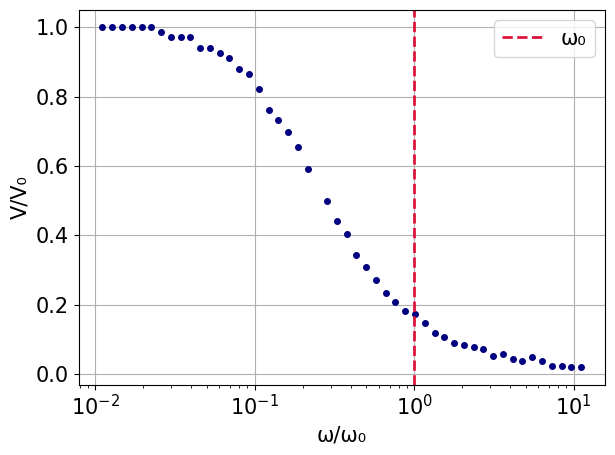

In [114]:
files = os.listdir('pasabajos/med 6')

names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.array(names)

m1 = []
for i in range(len(names)):
    df = pd.read_csv(f'pasabajos/med 6/{names[i]}.csv')
    m1.append((max(df.V_m)-min(df.V_m))/(max(df.V_e)-min(df.V_e)))
plt.scatter(names/9000,m1,c='navy')
plt.xscale('log')
plt.grid()
plt.xlabel('\u03C9/\u03C9\u2080')
plt.ylabel('V/V\u2080')
plt.axvline(x=1,c='crimson',ls='--',label='\u03C9\u2080')
plt.tight_layout()
plt.legend()

Text(0.02, 0.5, 'V/V₀')

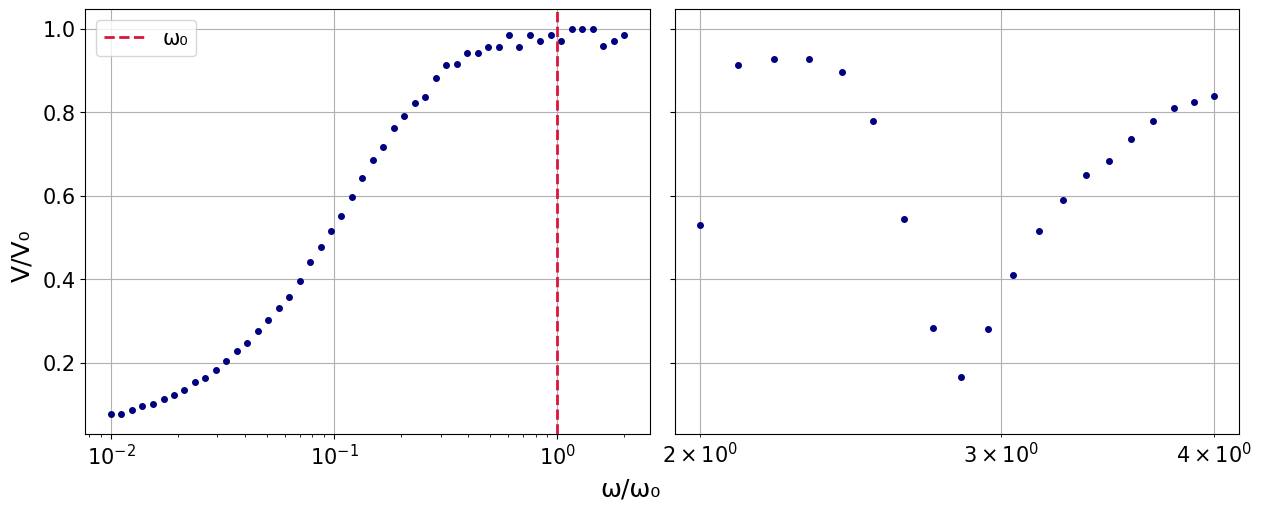

In [137]:
fig,axs = plt.subplots(1,2,figsize=(12.5,5),sharey=True,layout='constrained')

files = os.listdir('pasaaltos/med 1')
names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.array(names)
m1 = []
for i in range(len(names)):
    df = pd.read_csv(f'pasaaltos/med 1/{names[i]}.csv')
    m1.append((max(df.V_m)-min(df.V_m))/(max(df.V_e)-min(df.V_e)))
axs[0].scatter(names/10000,m1,c='navy')
axs[0].set_xscale('log')
axs[0].axvline(x=1,c='crimson',ls='--',label='\u03C9\u2080')
axs[0].grid()
axs[0].legend()

files = os.listdir('pasaaltos/mal/med 1')
names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.array(names)
m1 = []
for i in range(len(names)):
    df = pd.read_csv(f'pasaaltos/mal/med 1/{names[i]}.csv')
    m1.append((max(df.V_m)-min(df.V_m))/(max(df.V_e)-min(df.V_e)))
axs[1].scatter(names/10000,m1,c='navy')
axs[1].set_xscale('log')
axs[1].grid(visible=True,which='Both')

fig.supxlabel('\u03C9/\u03C9\u2080')
fig.supylabel('V/V\u2080')

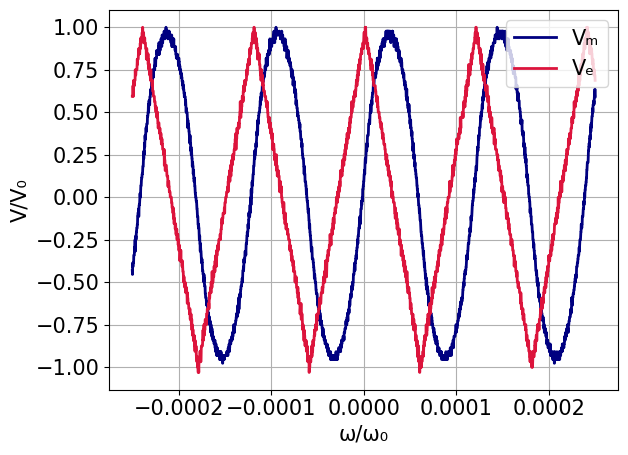

In [155]:
files = os.listdir('pasabajos/integrador')

names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.array(names)

df = pd.read_csv(f'pasabajos/integrador/{names[1]}.csv')
plt.plot(df.t,df.V_m/max(df.V_m),'navy',label='V\u2098')
plt.plot(df.t,df.V_e/max(df.V_e),'crimson',label='V\u2091')
plt.grid()
plt.xlabel('\u03C9/\u03C9\u2080')
plt.ylabel('V/V\u2080')
plt.tight_layout()
plt.legend(loc=1)